# Run the VAE MNIST training

In [1]:
from mnist_vae import vaeMNISTConv2D
from plotDecoderSamples import plotDecoderSamples
from plotLatentSpace import plotLatentSpace

Set training parameters

In [2]:
epochs = 10
batch_size = 128

Create our training model

In [3]:
vae = vaeMNISTConv2D()

Train shape: (60000, 28, 28, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 8)    80          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 26, 26, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 8)    0           conv2d_1[0][0]                   
_____________________________________________________________________________

Set up necessary callback

In [4]:
plotLatentCallback = plotLatentSpace('latent_plots', vae.x_test, vae.y_test)
plotDecoderSamples = plotDecoderSamples('decoder_samples')

Run the actual training

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59776/60000 [============================>.] - ETA: 0s - loss: 4600864.5107

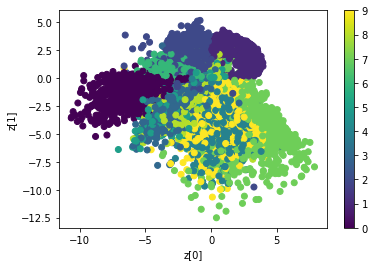

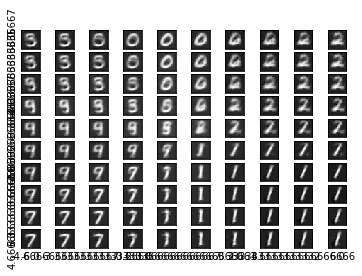

60000/60000 [==============================] - 16s 259us/step - loss: 4597138.0516 - val_loss: 5306446.5094
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 3917942.0139

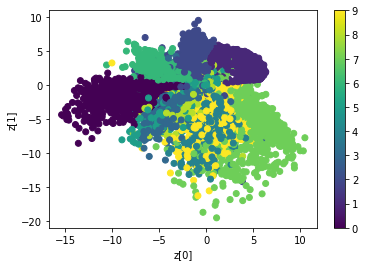

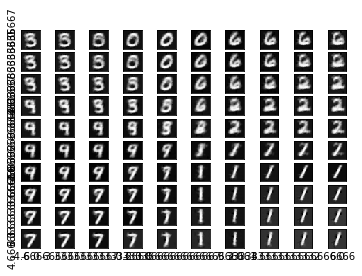

60000/60000 [==============================] - 13s 210us/step - loss: 3916547.0775 - val_loss: 3629094.8826
Epoch 3/10
59904/60000 [============================>.] - ETA: 0s - loss: 3831496.9610

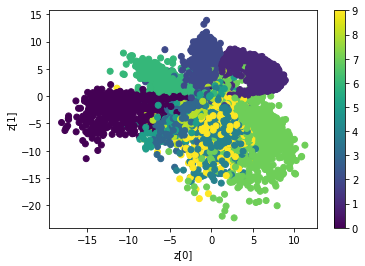

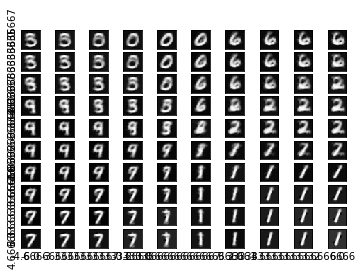

60000/60000 [==============================] - 13s 211us/step - loss: 3830033.3455 - val_loss: 3564407.5871
Epoch 4/10
59392/60000 [============================>.] - ETA: 0s - loss: 3777843.8610

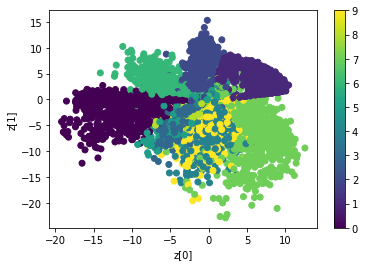

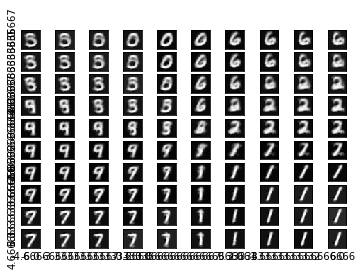

60000/60000 [==============================] - 12s 208us/step - loss: 3776476.0892 - val_loss: 3508782.3136
Epoch 5/10
59520/60000 [============================>.] - ETA: 0s - loss: 3746005.7183

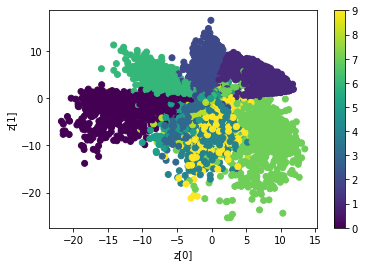

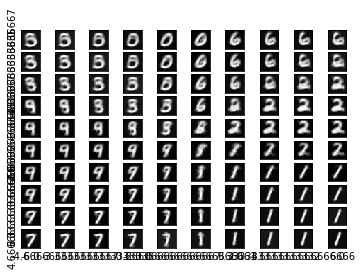

60000/60000 [==============================] - 13s 221us/step - loss: 3744101.9925 - val_loss: 3485008.6139
Epoch 6/10
59776/60000 [============================>.] - ETA: 0s - loss: 3720648.0171

In [ ]:
vae.vae_model.fit(
    vae.x_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(vae.x_test, None),
    callbacks=[plotLatentCallback, plotDecoderSamples],
)

Save the resulting model

In [ ]:
vae.vae_model.save_model('trainings/vae_mlp_mnist.h5')